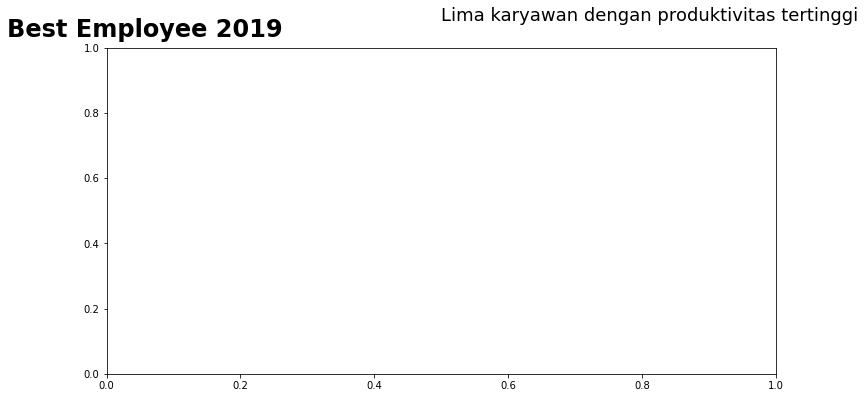

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv", index_col="Bulan")/1000

fig, ax = plt.subplots(1,1, figsize =(12,6))
fig.suptitle("Best Employee 2019", x=0.01,y=0.95, fontsize=24, fontweight = 'bold', ha = 'left')
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha = 'right')


plt.show()